In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
def LeNet():
    inputs=tf.keras.Input(shape=(32,32,3))#Dense连接层必须指明输入维度
    
    x=tf.keras.layers.Conv2D(filters=6,kernel_size=(5,5),strides=1,padding='valid',activation='sigmoid')(inputs)
    x=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='valid')(x)
        
    x=tf.keras.layers.Conv2D(filters=16,kernel_size=(5,5),strides=1,padding='valid',activation='sigmoid')(x)
    x=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='valid')(x)
        
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(120,activation='sigmoid')(x)
    x=tf.keras.layers.Dense(84,activation='sigmoid')(x)
    output=tf.keras.layers.Dense(10,activation='softmax')(x)
    
    model=tf.keras.Model(inputs,output)
    return model
        

In [5]:
model = LeNet()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/Baseline.ckpt"

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

Epoch 1/5
782/782 [==============================] - 8s 7ms/step - loss: 2.1210 - sparse_categorical_accuracy: 0.1949 - val_loss: 1.9668 - val_sparse_categorical_accuracy: 0.2655
Epoch 2/5
782/782 [==============================] - 5s 6ms/step - loss: 1.9039 - sparse_categorical_accuracy: 0.2897 - val_loss: 1.8240 - val_sparse_categorical_accuracy: 0.3290
Epoch 3/5
782/782 [==============================] - 5s 6ms/step - loss: 1.7695 - sparse_categorical_accuracy: 0.3515 - val_loss: 1.6854 - val_sparse_categorical_accuracy: 0.3861
Epoch 4/5
782/782 [==============================] - 5s 6ms/step - loss: 1.6801 - sparse_categorical_accuracy: 0.3882 - val_loss: 1.6271 - val_sparse_categorical_accuracy: 0.4085
Epoch 5/5
782/782 [==============================] - 5s 6ms/step - loss: 1.6218 - sparse_categorical_accuracy: 0.4085 - val_loss: 1.5808 - val_sparse_categorical_accuracy: 0.4205
Model: "model"
_________________________________________________________________
 Layer (type)           

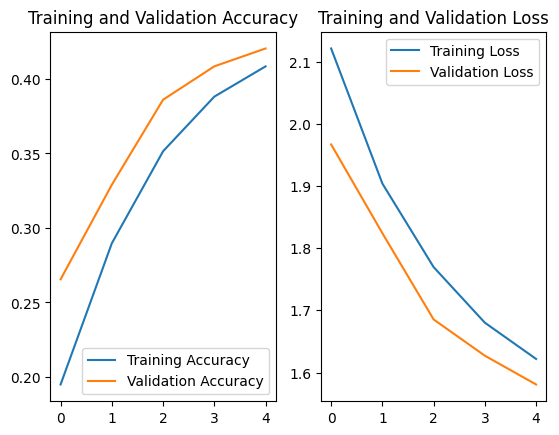

In [6]:
# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()